In [25]:
import glob
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

In [20]:
def get_most_frequent_label(cls_occurences):

    labels = np.argmax(cls_occurences, axis=0).astype(float)
    labels[np.sum(cls_occurences, axis=0) == 0] = np.nan

    return labels

In [5]:
dataset_dir = "/mnt/disks/disk10/2008/01/"
daylight_dir = os.path.join(dataset_dir, "daylight")
night_dir = os.path.join(dataset_dir, "night")
fucket_dir = os.path.join(dataset_dir, "fucked")

### Check if interpolation worked

In [7]:
for swath_name in glob.glob(os.path.join(daylight_dir, "MY*.npy")):
    
    swath = np.load(swath_name)
    
    assert np.sum(np.isnan(swath)) == 0

In [9]:
for swath_name in glob.glob(os.path.join(night_dir, "MY*.npy")):
    
    swath = np.load(swath_name)
    
    nan_count = np.sum(np.isnan(swath), axis=(1, 2))
    
    for i in [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]:
        assert nan_count[i] == 0, "{}: channel {}".format(swath_name, i)

### Visualize daylight swath with labels

In [96]:
swath_name = glob.glob(os.path.join(daylight_dir, "MY*.npy"))[72]
swath = np.load(swath_name)

label_mask = get_most_frequent_label(swath[19:])
cloud_mask = swath[18]

swath_basename = os.path.basename(swath_name)
swath_rgb = imread(os.path.join(daylight_dir, "rgb", swath_basename.replace(".npy", ".png")))

(-8.5859375, 131.875, -88.25, -62.59375)

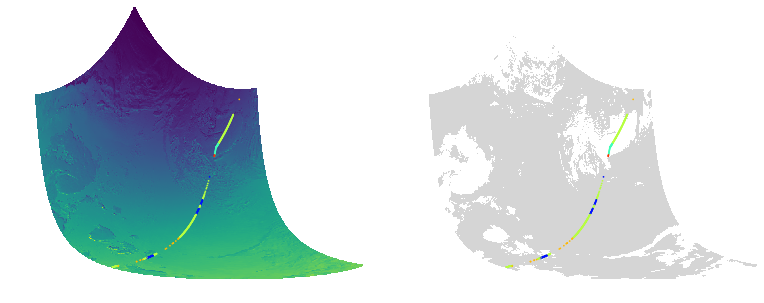

In [97]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.pcolormesh(swath[14], swath[13], swath[0])
plt.scatter(swath[14], swath[13], c=label_mask, s=0.5, cmap=plt.cm.jet, vmin=0, vmax=7)
plt.axis('off')

plt.subplot(132)
plt.pcolormesh(swath[14], swath[13], cloud_mask, cmap="gray", vmin=-5, vmax=1)
plt.scatter(swath[14], swath[13], c=label_mask, s=0.5, cmap=plt.cm.jet, vmin=0, vmax=7)
plt.axis('off')

### Visualize sampled tiles

In [98]:
# labelled tiles
positions = np.load(os.path.join(daylight_dir, "label", "metadata", swath_basename))

# unlabelled tiles
un_positions = np.load(os.path.join(daylight_dir, "nonlabel", "metadata", swath_basename))

(-8.5859375, 131.875, -88.25, -62.59375)

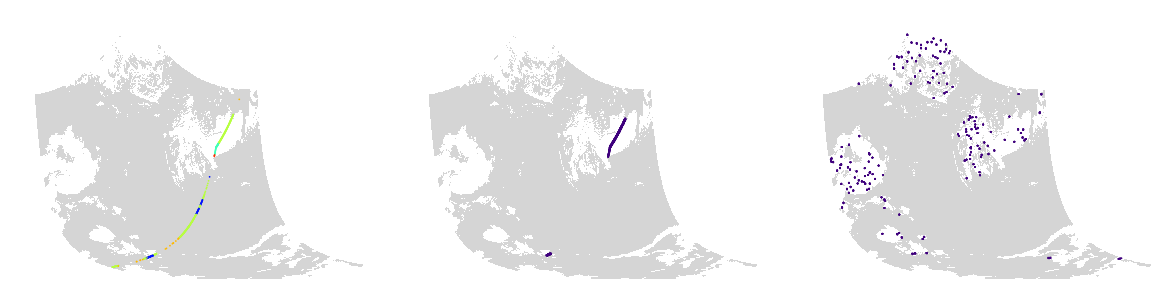

In [99]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.pcolormesh(swath[14], swath[13], cloud_mask, cmap="gray", vmin=-5, vmax=1)
plt.scatter(swath[14], swath[13], c=label_mask, s=0.5, cmap=plt.cm.jet, vmin=0, vmax=7)
plt.axis('off')

plt.subplot(132)
plt.pcolormesh(swath[14], swath[13], cloud_mask, cmap="gray", vmin=-5, vmax=1)

for pos in positions:
    (x1, x2), (y1, y2) = pos
    plt.scatter(swath[14, x1:x2, y1:y2], swath[13, x1:x2, y1:y2], c=np.ones((3, 3)), cmap="Purples", vmin=0, vmax=1, s=0.5)

plt.axis('off')

plt.subplot(133)
plt.pcolormesh(swath[14], swath[13], cloud_mask, cmap="gray", vmin=-5, vmax=1)

for pos in un_positions:
    (x1, x2), (y1, y2) = pos
    plt.scatter(swath[14, x1:x2, y1:y2], swath[13, x1:x2, y1:y2], c=np.ones((3, 3)), cmap="Purples", vmin=0, vmax=1, s=0.5)

plt.axis('off')

In [ ]:
# 